In [ ]:
%pip install yfinance

In [ ]:
%pip install yahoo_fin

In [1]:
import yfinance as yf
from yahoo_fin import stock_info

In [2]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [3]:
TICKER = 'O'
DIV_PERIODS = 7

In [4]:
stock_basic_info = yf.Ticker(TICKER).info

In [5]:
stock_basic_info

{'regularMarketPrice': None,
 'preMarketPrice': None,
 'logo_url': '',
 'trailingPegRatio': 4.3042}

과거 배당금 정보 가져 오기

In [6]:
end_date = datetime.now().strftime("%Y-%m-%d")
print("end date: " , end_date)

end date:  2022-12-28


In [7]:
start_date = (datetime.now() - relativedelta(years=DIV_PERIODS)).strftime("%Y-%m-%d")
print("start date: ", start_date)

start date:  2015-12-28


In [8]:
dividends = stock_info.get_dividends(TICKER, start_date=start_date, end_date=end_date)

In [9]:
dividends

,dividend,ticker
2015-12-30,0.185078,O
2016-01-28,0.192829,O
2016-02-26,0.192829,O
2016-03-30,0.192829,O
2016-04-28,0.192829,O
...,...,...
2022-07-29,0.248000,O
2022-08-31,0.248000,O
2022-09-30,0.248000,O
2022-10-31,0.248000,O


In [10]:
dividends.head(3)

,dividend,ticker
2015-12-30,0.185078,O
2016-01-28,0.192829,O
2016-02-26,0.192829,O


In [11]:
dividends.tail(3)

,dividend,ticker
2022-09-30,0.248,O
2022-10-31,0.248,O
2022-11-30,0.248,O


In [12]:
dividends['dividend']

2015-12-30    0.185078
2016-01-28    0.192829
2016-02-26    0.192829
2016-03-30    0.192829
2016-04-28    0.192829
                ...   
2022-07-29    0.248000
2022-08-31    0.248000
2022-09-30    0.248000
2022-10-31    0.248000
2022-11-30    0.248000
Name: dividend, Length: 84, dtype: float64

In [13]:
dividends.drop(['ticker'], axis=1, inplace=True)

In [14]:
dividends

,dividend
2015-12-30,0.185078
2016-01-28,0.192829
2016-02-26,0.192829
2016-03-30,0.192829
2016-04-28,0.192829
...,...
2022-07-29,0.248000
2022-08-31,0.248000
2022-09-30,0.248000
2022-10-31,0.248000


In [15]:
import matplotlib.pyplot as plt

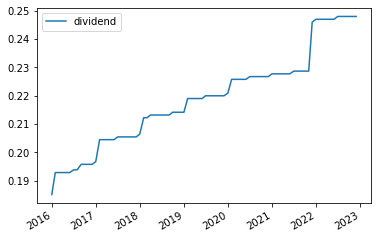

In [16]:
dividends.plot()
plt.show()

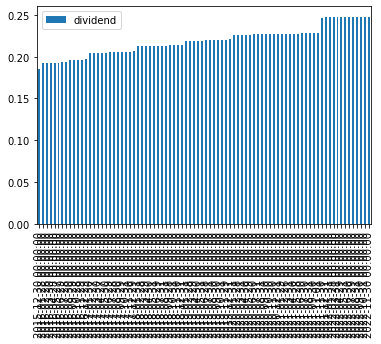

In [17]:
dividends.plot(kind='bar')
plt.show()

In [18]:
# Get stock price data
stock_data = yf.download(TICKER, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [19]:
stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-12-28,49.670544,50.155041,49.496124,50.145348,37.113575,1129627
2015-12-29,50.310078,50.629845,50.125969,50.562016,37.421951,1566473
2015-12-30,50.465115,50.784885,50.242249,50.310078,37.372295,1331693
2015-12-31,50.387596,50.532948,49.941860,50.029072,37.163551,1282570
2016-01-04,49.554264,49.825581,48.905041,49.593021,36.839645,2095682
...,...,...,...,...,...,...
2022-12-20,63.310001,63.610001,62.590000,63.110001,63.110001,4438400
2022-12-21,63.980000,64.800003,63.930000,64.239998,64.239998,3845700
2022-12-22,63.959999,64.199997,62.520000,63.450001,63.450001,3204100


In [20]:
stock_data.tail(3)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-22,63.959999,64.199997,62.520000,63.450001,63.450001,3204100
2022-12-23,63.320000,64.410004,63.240002,64.410004,64.410004,1847900
2022-12-27,64.410004,64.419998,63.630001,64.110001,64.110001,4073900


In [21]:
stock_data.loc[dividends.index].head(3)

,Open,High,Low,Close,Adj Close,Volume
2015-12-30,50.465115,50.784885,50.242249,50.310078,37.372295,1331693
2016-01-28,53.149223,53.798450,52.926357,53.168606,39.638935,3436457
2016-02-26,58.003876,58.003876,56.695736,56.812016,42.495884,2571538


In [22]:
df_close_price = stock_data.loc[dividends.index]['Close']

In [23]:
df_close_price

2015-12-30    50.310078
2016-01-28    53.168606
2016-02-26    56.812016
2016-03-30    60.281010
2016-04-28    57.625969
                ...    
2022-07-29    73.989998
2022-08-31    68.279999
2022-09-30    58.200001
2022-10-31    62.270000
2022-11-30    63.070000
Name: Close, Length: 84, dtype: float64

In [24]:
df_close_price[:3]

2015-12-30    50.310078
2016-01-28    53.168606
2016-02-26    56.812016
Name: Close, dtype: float64

In [25]:
dividends['close'] = df_close_price

In [26]:
dividends

,dividend,close
2015-12-30,0.185078,50.310078
2016-01-28,0.192829,53.168606
2016-02-26,0.192829,56.812016
2016-03-30,0.192829,60.281010
2016-04-28,0.192829,57.625969
...,...,...
2022-07-29,0.248000,73.989998
2022-08-31,0.248000,68.279999
2022-09-30,0.248000,58.200001
2022-10-31,0.248000,62.270000


In [27]:
div_freq = round(len(dividends.index)/DIV_PERIODS)

In [28]:
div_freq

12

In [29]:
div_yield = dividends['dividend']*div_freq / dividends['close'] * 100

In [30]:
div_yield

2015-12-30    4.414495
2016-01-28    4.352095
2016-02-26    4.072991
2016-03-30    3.838602
2016-04-28    4.015460
                ...   
2022-07-29    4.022165
2022-08-31    4.358524
2022-09-30    5.113402
2022-10-31    4.779187
2022-11-30    4.718567
Length: 84, dtype: float64

In [31]:
div_yield = round(div_yield, 2)
div_yield

2015-12-30    4.41
2016-01-28    4.35
2016-02-26    4.07
2016-03-30    3.84
2016-04-28    4.02
              ... 
2022-07-29    4.02
2022-08-31    4.36
2022-09-30    5.11
2022-10-31    4.78
2022-11-30    4.72
Length: 84, dtype: float64

In [32]:
dividends['div yield'] = div_yield

In [33]:
dividends

,dividend,close,div yield
2015-12-30,0.185078,50.310078,4.41
2016-01-28,0.192829,53.168606,4.35
2016-02-26,0.192829,56.812016,4.07
2016-03-30,0.192829,60.281010,3.84
2016-04-28,0.192829,57.625969,4.02
...,...,...,...
2022-07-29,0.248000,73.989998,4.02
2022-08-31,0.248000,68.279999,4.36
2022-09-30,0.248000,58.200001,5.11
2022-10-31,0.248000,62.270000,4.78


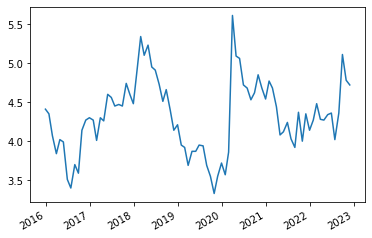

In [34]:
dividends['div yield'].plot()
plt.show()

In [35]:
div_min = min(dividends['div yield'])
div_max = max(dividends['div yield'])

In [36]:
div_min, div_max

(3.33, 5.61)

In [37]:
buy_price = dividends['dividend'][-1] * div_freq * 100 / div_min
buy_price

89.36936936936938

In [38]:
sell_price = dividends['dividend'][-1] * div_freq * 100 / div_max
sell_price

53.04812834224599

In [39]:
current_datetime = datetime.strptime(end_date, "%Y-%m-%d")

In [40]:
current_datetime

datetime.datetime(2022, 12, 28, 0, 0)

In [41]:
current_price = stock_data.iloc[-1]['Close']

In [42]:
current_price

64.11000061035156

In [43]:
last_dividend = dividends.iloc[-1]['dividend']
last_dividend

0.248

In [44]:
current_div_yield = round(last_dividend*div_freq/current_price*100, 2)
current_div_yield

4.64

In [45]:
import matplotlib.pyplot as plt

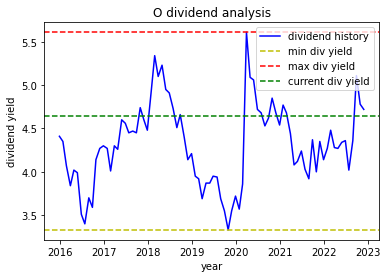

In [46]:
plt.plot(dividends['div yield'],  color='b', label = 'dividend history')
plt.axhline(y=div_min, color='y', linestyle='--', label='min div yield')
plt.axhline(y=div_max, color='r', linestyle='--', label='max div yield')
plt.axhline(y=current_div_yield, color='g', linestyle='--', label='current div yield')
plt.title(f'{TICKER} dividend analysis')
plt.xlabel('year')
plt.ylabel('dividend yield')
plt.legend()
plt.show()

In [47]:
def calculate_buy_score(cur_div, min_div, max_div):
    return round((cur_div - min_div) / (max_div - min_div) * 100)

In [48]:
buy_score = calculate_buy_score(current_div_yield, div_min, div_max)
print(f'buy score = {buy_score}')

buy score = 57


"""
FIN
"""